In [40]:
#import redlab as rl
import numpy as np
from time import sleep
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


# 1. Programmierung der AD/DA-Wandlerkarte

In [41]:
BOARD_NUM = 0
CHANNEL = 0
RANG = 1
RANG_OUT = 101
VALUES = 1000

def read():
    ADWert = rl.cbAIn(0,0,1)
    print("------- einzelne Werte -------------------------")
    print(f"16 Bit Value: {str(rl.cbAIn(0,0,1))}")
    print(f"Voltage Value: {str(rl.cbVIn(0,0,1))}" )
    # print("------- Messreihe -------------------------")
    # print(f"Messreihe: {str(rl.cbAInScan(0,0,0,300,8000,1))}")
    # print(f"Messreihe: {str(rl.cbVInScan(0,0,0,300,8000,1))}" )
    # print("------- Ausgabe -------------------------")

In [42]:
def write_to_board():
    try:
        val = float(input("Spannungswert eingeben:\n"))
        rl.cbVOut(BOARD_NUM, CHANNEL, RANG_OUT, val)
    except Exception as e:
        print(e)
    
    input("Press any key")

# 2. Genauigkeit der AD-Wandlung

In [78]:
#quantisierungsfehler = (Umax - Umin) / 2^n
qfehler = (10-(-10))/(2**11)
print(qfehler)


0.009765625


In [80]:
messungen = np.genfromtxt("02_messungen.txt",delimiter="|",skip_header=1,usecols=(3,4,5))
print(messungen)
ad = [row[0] for row in messungen]
fein = [row[1] for row in messungen]
analog = [row[2] for row in messungen]


[[ 0.99   0.992  0.988]
 [ 2.015  2.     1.994]
 [ 3.023  3.008  3.   ]
 [ 4.086  4.066  4.04 ]
 [ 5.031  4.979  4.95 ]
 [ 6.044  5.988  5.96 ]
 [ 7.029  6.997  6.96 ]
 [ 8.049  8.007  7.97 ]
 [ 9.132  9.066  9.02 ]
 [10.07  10.076 10.03 ]]


In [45]:
#messfehler berechnen
messfehler_pico = np.subtract(fein,ad)
messfehler_analog = np.subtract(fein,analog)
print(messfehler_pico)
print(messfehler_analog)

[ 0.002 -0.015 -0.015 -0.02  -0.052 -0.056 -0.032 -0.042 -0.066  0.006]
[0.004 0.006 0.008 0.026 0.029 0.028 0.037 0.037 0.046 0.046]


In [81]:
#standardabweichung berechnen
n = 10 #anzahl werte
for i in messfehler_pico:
    sum_pico =+ i**2
    
s_pico = np.sqrt((1/(n-1))*sum_pico)
print("Standardabweichung Ad Wandler: " + str(s_pico))

for i in messfehler_analog:
    sum_analog =+ i**2
    
s_analog = np.sqrt((1/(n-1))*sum_analog)
print("Standardabweichung Analog: " + str(s_analog))


Standardabweichung Ad Wandler: 0.002000000000000076
Standardabweichung Analog: 0.015333333333333718


# 3. Genauigkeit der DA-Wandlung

In [82]:
#quantisierungsfehler = (Umax - Umin) / 2^n
qfehler3 = (5-0)/(2**10)
print(qfehler3)

0.0048828125


In [83]:
messungen3 = np.genfromtxt("03_messungen.txt", skip_header=1, delimiter="|", usecols=(1,2))
print(messungen3)

[[0.5   0.512]
 [1.    1.01 ]
 [1.5   1.522]
 [2.    2.041]
 [2.5   2.545]
 [3.    3.048]
 [3.5   3.56 ]
 [4.    4.061]
 [4.5   4.569]
 [5.    5.11 ]]


In [84]:
ref = [row[0] for row in messungen3]
oszi = [row[1] for row in messungen3]
#messfehler berechnen
fehler= np.subtract(ref,oszi)

In [85]:
#standardabweichung berechnen
m = 10 #anzahl werte
for i in fehler:
    sum_oszi =+ i**2
s_oszi = np.sqrt((1/(m-1))*sum_oszi)
print("Standardabweichung: " + str(s_oszi))

Standardabweichung: 0.03666666666666677


# 4. Zeitverhalten der DA-Wandlung

In [86]:
def sinwave():
    sinwave = [np.sin(np.pi * 4 * (i/300)) for i in range(300)]
    values = 300
    for i in range(10):
        if i %10 == 0: print(f"###############{i}")
        for x in range(len(sinwave)):
            # print(sinwave[x]+1)
            rl.cbVOut(BOARD_NUM, CHANNEL, RANG_OUT, sinwave[x]+1)
            #sleep(0.1)

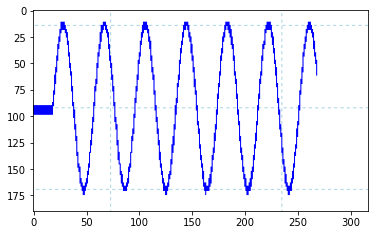

In [87]:
img = plt.imread('sinus.PNG')
plt.imshow(img)


# 5. Abtasttheorem

In [88]:
#Abtastfrequenz 8000hz,Amplitude 3 
def sinus():
    data = rl.cbVInScan(0,0,0,VALUES,8000,1)
    print(data)
    freq = "test"
    np.savetxt(f"sinus_{freq}.csv", [x / 1000000000000000000 for x in data], delimiter=",")
    plt.plot(data)
    plt.savefig(f'sinus_{freq}.png')
    plt.show()

2


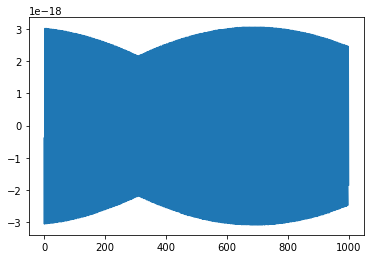

3


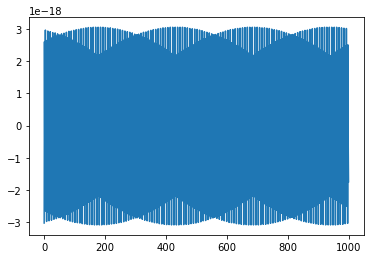

4


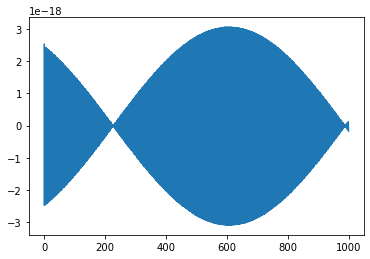

5


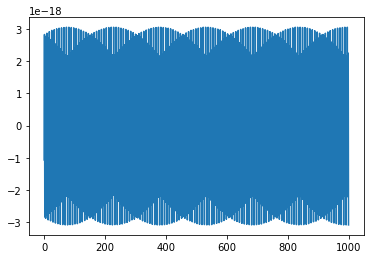

6


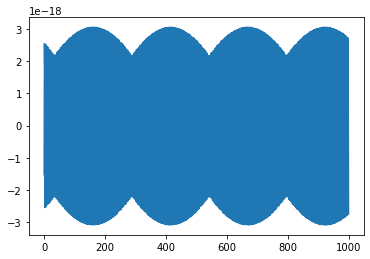

7


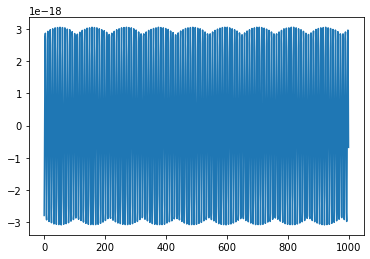

8


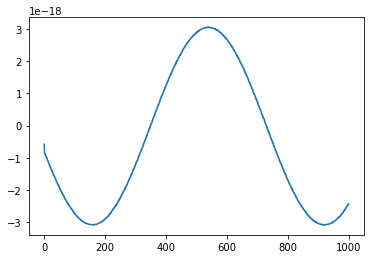

In [89]:
for f in range(2,9):
        sin = np.genfromtxt(f"sinus_{f}000.csv")
        print(f)
        plt.plot(sin)
        plt.pause(0.05)
